In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler , MinMaxScaler
from sklearn.metrics import mean_squared_error

In [4]:
df = pd.read_csv('data/smartwatches.csv', index_col=False)
df =df.drop(['Unnamed: 0'] , axis=1)
df.shape

(450, 15)

In [5]:
df.columns

Index(['Brand', 'Current Price', 'Original Price', 'Discount Percentage',
       'Rating', 'Number OF Ratings', 'Model Name', 'Dial Shape',
       'Strap Color', 'Strap Material', 'Touchscreen', 'Battery Life (Days)',
       'Bluetooth', 'Display Size', 'Weight'],
      dtype='object')

In [6]:
df.head()

,Brand,Current Price,Original Price,Discount Percentage,Rating,Number OF Ratings,Model Name,Dial Shape,Strap Color,Strap Material,Touchscreen,Battery Life (Days),Bluetooth,Display Size,Weight
0,noise,82990.0,89900.0,7.686318,4.0,65.0,Wrb-sw-colorfitpro4alpha-std-rgld_pnk,NaN,NaN,NaN,NaN,8.0,Yes,NaN,35 - 50 g
1,fire-boltt,3799.0,16999.0,77.651627,4.3,20788.0,BSW046,NaN,NaN,Silicon,Yes,3.5,Yes,1.8 inches,50 - 75 g
2,boat,1999.0,7990.0,74.981227,3.8,21724.0,Wave Call,NaN,NaN,Silicon,Yes,8.0,Yes,1.7 inches,35 - 50 g
3,fire-boltt,1799.0,19999.0,91.004550,4.3,13244.0,BSW053,NaN,NaN,Silicon,Yes,3.5,Yes,1.8 inches,75g +
4,noise,1599.0,4999.0,68.013603,4.1,13901.0,Wrb-sw-colorfitpulsegobuzz-std-blk_blk,NaN,NaN,Other,Yes,8.0,Yes,1.7 inches,35 - 50 g


In [7]:
df.describe(include='all')

,Brand,Current Price,Original Price,Discount Percentage,Rating,Number OF Ratings,Model Name,Dial Shape,Strap Color,Strap Material,Touchscreen,Battery Life (Days),Bluetooth,Display Size,Weight
count,450,440.000000,377.000000,377.000000,444.000000,391.000000,415,327,327,381,413,418.000000,444,420,264
unique,18,NaN,NaN,NaN,NaN,NaN,389,6,30,15,2,NaN,2,40,5
top,fire-boltt,NaN,NaN,NaN,NaN,NaN,beast pro,Circle,Black,Silicon,Yes,NaN,Yes,1.7 inches,20 - 35 g
freq,60,NaN,NaN,NaN,NaN,NaN,5,131,133,248,389,NaN,440,68,80
mean,NaN,12747.554545,14598.204244,48.236894,4.031306,11594.726343,NaN,NaN,NaN,NaN,NaN,14.077392,NaN,NaN,NaN
std,NaN,17760.666099,15450.028869,24.109830,0.550548,40423.889227,NaN,NaN,NaN,NaN,NaN,7.718503,NaN,NaN,NaN
min,NaN,1199.000000,1669.000000,-79.688436,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,0.750000,NaN,NaN,NaN
25%,NaN,2180.750000,5999.000000,33.337037,3.900000,68.500000,NaN,NaN,NaN,NaN,NaN,8.000000,NaN,NaN,NaN
50%,NaN,3999.000000,7999.000000,54.550414,4.100000,996.000000,NaN,NaN,NaN,NaN,NaN,17.500000,NaN,NaN,NaN
75%,NaN,17121.750000,17999.000000,66.677780,4.300000,6022.000000,NaN,NaN,NaN,NaN,NaN,22.000000,NaN,NaN,NaN


### Negative Discount Values
- Some discount values are entered negative  as minimum discount percentage is -79
- We will convert these negative values to positive values

In [8]:
df['Discount Percentage'] = df['Discount Percentage'].apply(lambda x: abs(x) if x<0 else x)

In [9]:
df['Discount Percentage'].describe()

count    377.000000
mean      49.061777
std       22.378793
min        0.003040
25%       33.338890
50%       54.561988
75%       66.677780
max       91.004550
Name: Discount Percentage, dtype: float64

In [10]:
df.isnull().sum()

Brand                    0
Current Price           10
Original Price          73
Discount Percentage     73
Rating                   6
Number OF Ratings       59
Model Name              35
Dial Shape             123
Strap Color            123
Strap Material          69
Touchscreen             37
Battery Life (Days)     32
Bluetooth                6
Display Size            30
Weight                 186
dtype: int64

Dropping unncessary columns

In [11]:
df = df.drop(columns=['Model Name','Touchscreen','Bluetooth', 'Display Size', 'Weight'])

In [12]:
#remove outliers in Number of ratings column. remove rows
df = df[df['Number OF Ratings'] < 200000]

Seperating numeric columns and categorical columns

In [13]:
num_col = [col for col in df.columns if df[col].dtype != 'object']
cat_col = [col for col in df.columns if df[col].dtype == 'object']

print(f'Numeric Columns: {num_col}')
print(f'Categorical Columns: {cat_col}')

Numeric Columns: ['Current Price', 'Original Price', 'Discount Percentage', 'Rating', 'Number OF Ratings', 'Battery Life (Days)']
Categorical Columns: ['Brand', 'Dial Shape', 'Strap Color', 'Strap Material']


In [41]:
num_col.remove('Discount Percentage')

## Working with Numerical Values

In [42]:
dfn = df[num_col]
dfn.head()

,Current Price,Original Price,Rating,Number OF Ratings,Battery Life (Days)
0,82990.0,89900.0,4.0,65.0,8.0
1,3799.0,16999.0,4.3,20788.0,3.5
2,1999.0,7990.0,3.8,21724.0,8.0
3,1799.0,19999.0,4.3,13244.0,3.5
4,1599.0,4999.0,4.1,13901.0,8.0


In [43]:
dfn.isna().sum()

Current Price           8
Original Price         60
Rating                  0
Number OF Ratings       0
Battery Life (Days)    28
dtype: int64

In [44]:
i = 0  # Replace 0 with the desired value of "i"
if i in dfn.index and pd.isna(dfn.loc[i, 'Original Price']) and not pd.isna(dfn.loc[i, 'Current Price']):
    dfn.loc[i, 'Original Price'] = dfn.loc[i, 'Current Price']


In [45]:
dfn.isna().sum()

Current Price           8
Original Price         60
Rating                  0
Number OF Ratings       0
Battery Life (Days)    28
dtype: int64

In [46]:
if i in dfn.index and pd.isna(dfn.loc[i, 'Original Price']):
    dfn.loc[i, 'Original Price'] = dfn.loc[i, 'Current Price']
    dfn.loc[i, 'Discount Percentage'] = 0


In [47]:
dfn['Discount Price'] = dfn['Original Price'] - dfn['Current Price']

C:\Users\aarad\AppData\Local\Temp\ipykernel_18604\1416350473.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfn['Discount Price'] = dfn['Original Price'] - dfn['Current Price']


In [48]:
dfn.isna().sum()

Current Price           8
Original Price         60
Rating                  0
Number OF Ratings       0
Battery Life (Days)    28
Discount Price         60
dtype: int64

In [49]:
#fill missing values with median for all columns
dfn = dfn.fillna(dfn.median())

In [50]:
dfn.isna().sum()

Current Price          0
Original Price         0
Rating                 0
Number OF Ratings      0
Battery Life (Days)    0
Discount Price         0
dtype: int64

<Axes: >

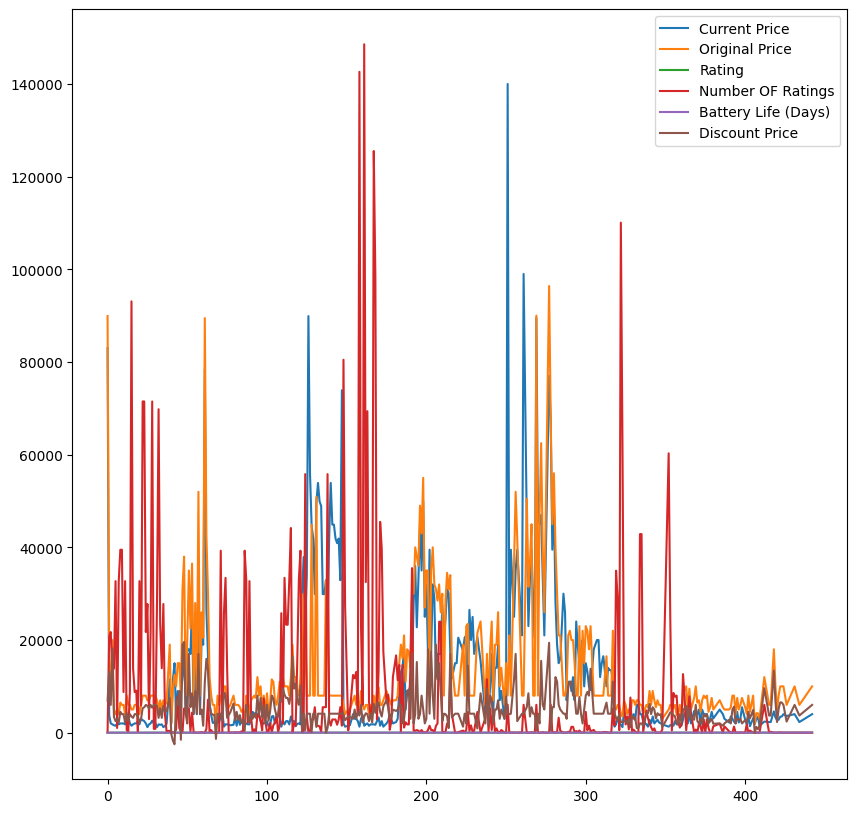

In [51]:
#plot the distribution of the numeric columns
dfn.plot(figsize=(10,10))


In [52]:
copy1 = dfn.copy()

In [53]:
columns_to_scale = dfn.columns.difference(['Discount Price'])

In [54]:
# scaler1 = MinMaxScaler()
# dfn[columns_to_scale] = scaler1.fit_transform(dfn[columns_to_scale])

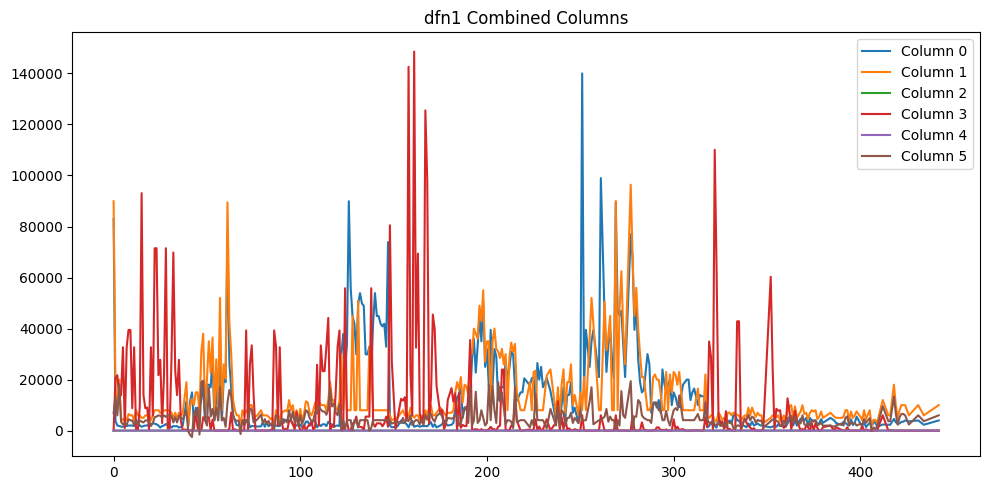

In [55]:
fig, ax = plt.subplots(figsize=(10, 5))  # Create a single subplot

# Plot each column of dfn1 on the same subplot
for column in range(dfn.shape[1]):
    ax.plot(dfn.iloc[:, column], label=f'Column {column}')

ax.legend()
ax.set_title('dfn1 Combined Columns')

plt.tight_layout()
plt.show()

## Working with Categorical Columns

In [56]:
dfc = df[cat_col]
dfc.describe()

,Brand,Dial Shape,Strap Color,Strap Material
count,388,268,268,322
unique,18,6,26,15
top,noise,Circle,Black,Silicon
freq,41,115,109,205


In [57]:
dfc.columns

Index(['Brand', 'Dial Shape', 'Strap Color', 'Strap Material'], dtype='object')

In [58]:
dfc['Strap Material'].value_counts()


Strap Material
Silicon                        205
Rubber                          22
Other                           21
Leather                         17
Stainless Steel                 15
Fluoroelastomer                 12
Aluminium                       11
Thermo Plastic Polyurethene      7
Fabric                           3
Metal                            2
Plastic                          2
Synthetic                        2
Polycarbonate                    1
Carbon-Fiber;                    1
Nylon                            1
Name: count, dtype: int64

In [59]:

brand_cnt = dfc['Brand'].value_counts()
strap_color_cnt = dfc['Strap Color'].value_counts()
strap_mat_cnt = dfc['Strap Material'].value_counts()

repl_brand = brand_cnt[brand_cnt < 25].index
repl_strap = strap_color_cnt[strap_color_cnt < 10].index
repl_mat = strap_mat_cnt[strap_mat_cnt < 10].index

dfc['Brand'] = dfc['Brand'].replace(repl_brand, 'Others')
dfc['Strap Color'] = dfc['Strap Color'].replace(repl_strap, 'Others')
dfc['Strap Material'] = dfc['Strap Material'].replace(repl_mat, 'Others')



C:\Users\aarad\AppData\Local\Temp\ipykernel_18604\4289581026.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfc['Brand'] = dfc['Brand'].replace(repl_brand, 'Others')
C:\Users\aarad\AppData\Local\Temp\ipykernel_18604\4289581026.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfc['Strap Color'] = dfc['Strap Color'].replace(repl_strap, 'Others')
C:\Users\aarad\AppData\Local\Temp\ipykernel_18604\4289581026.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFram

In [60]:
#apply onegotencdoing to the categorical columns
dfc = pd.get_dummies(dfc, drop_first=True)

dfc = dfc.astype('int')


In [61]:
dfc.head()

,Brand_apple,Brand_boat,Brand_dizo,Brand_fire-boltt,Brand_garmin,Brand_noise,Brand_pebble,Brand_samsung,Brand_zebronics,Dial Shape_Contemporary,Dial Shape_Curved,Dial Shape_Oval,Dial Shape_Rectangle,Dial Shape_Square,Strap Color_Blue,Strap Color_Green,Strap Color_Grey,Strap Color_Others,Strap Color_Pink,Strap Color_Red,Strap Color_Silver,Strap Material_Fluoroelastomer,Strap Material_Leather,Strap Material_Other,Strap Material_Others,Strap Material_Rubber,Strap Material_Silicon,Strap Material_Stainless Steel
0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


### Concataining the dataframes


In [62]:
data = pd.concat([pd.DataFrame(dfn), dfc], axis=1)

In [63]:
data.head()

,Current Price,Original Price,Rating,Number OF Ratings,Battery Life (Days),Discount Price,Brand_apple,Brand_boat,Brand_dizo,Brand_fire-boltt,Brand_garmin,Brand_noise,Brand_pebble,Brand_samsung,Brand_zebronics,Dial Shape_Contemporary,Dial Shape_Curved,Dial Shape_Oval,Dial Shape_Rectangle,Dial Shape_Square,Strap Color_Blue,Strap Color_Green,Strap Color_Grey,Strap Color_Others,Strap Color_Pink,Strap Color_Red,Strap Color_Silver,Strap Material_Fluoroelastomer,Strap Material_Leather,Strap Material_Other,Strap Material_Others,Strap Material_Rubber,Strap Material_Silicon,Strap Material_Stainless Steel
0,82990.0,89900.0,4.0,65.0,8.0,6910.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,3799.0,16999.0,4.3,20788.0,3.5,13200.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,1999.0,7990.0,3.8,21724.0,8.0,5991.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,1799.0,19999.0,4.3,13244.0,3.5,18200.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,1599.0,4999.0,4.1,13901.0,8.0,3400.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [64]:
data.columns

Index(['Current Price', 'Original Price', 'Rating', 'Number OF Ratings',
       'Battery Life (Days)', 'Discount Price', 'Brand_apple', 'Brand_boat',
       'Brand_dizo', 'Brand_fire-boltt', 'Brand_garmin', 'Brand_noise',
       'Brand_pebble', 'Brand_samsung', 'Brand_zebronics',
       'Dial Shape_Contemporary', 'Dial Shape_Curved', 'Dial Shape_Oval',
       'Dial Shape_Rectangle', 'Dial Shape_Square', 'Strap Color_Blue',
       'Strap Color_Green', 'Strap Color_Grey', 'Strap Color_Others',
       'Strap Color_Pink', 'Strap Color_Red', 'Strap Color_Silver',
       'Strap Material_Fluoroelastomer', 'Strap Material_Leather',
       'Strap Material_Other', 'Strap Material_Others',
       'Strap Material_Rubber', 'Strap Material_Silicon',
       'Strap Material_Stainless Steel'],
      dtype='object')

In [65]:
data.isna().sum()

Current Price                     0
Original Price                    0
Rating                            0
Number OF Ratings                 0
Battery Life (Days)               0
Discount Price                    0
Brand_apple                       0
Brand_boat                        0
Brand_dizo                        0
Brand_fire-boltt                  0
Brand_garmin                      0
Brand_noise                       0
Brand_pebble                      0
Brand_samsung                     0
Brand_zebronics                   0
Dial Shape_Contemporary           0
Dial Shape_Curved                 0
Dial Shape_Oval                   0
Dial Shape_Rectangle              0
Dial Shape_Square                 0
Strap Color_Blue                  0
Strap Color_Green                 0
Strap Color_Grey                  0
Strap Color_Others                0
Strap Color_Pink                  0
Strap Color_Red                   0
Strap Color_Silver                0
Strap Material_Fluoroelastom

In [66]:
data.to_csv('data/smartwatches_cleaned.csv')

In [84]:
features = data.columns

In [85]:
#remove discount price from features
features = features.drop('Discount Price')

In [67]:
import joblib

In [86]:
joblib.dump(features , 'feature_list.pkl')

['feature_list.pkl']